<a href="https://colab.research.google.com/github/25lahari/FMML_Projects_and_Labs/blob/main/AIML_III_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [17]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [18]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [19]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [20]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

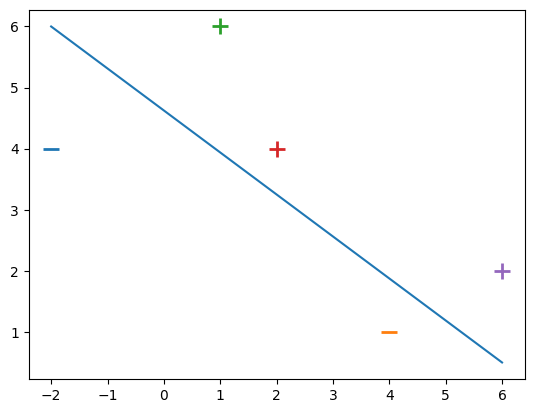

In [21]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

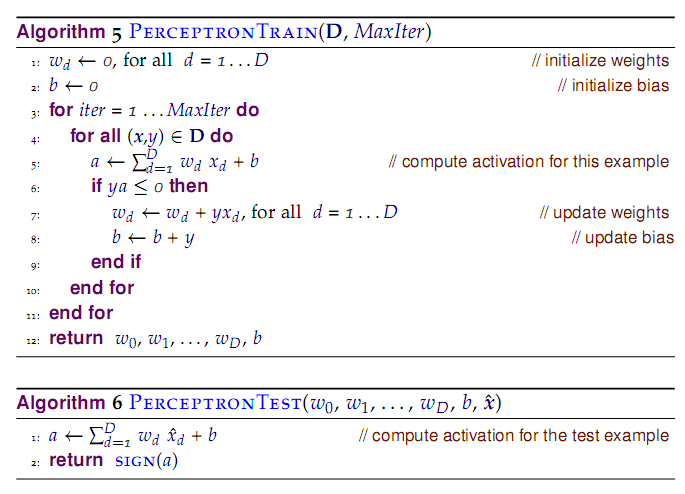

The algorithm is shown in the above image.

In [22]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [23]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

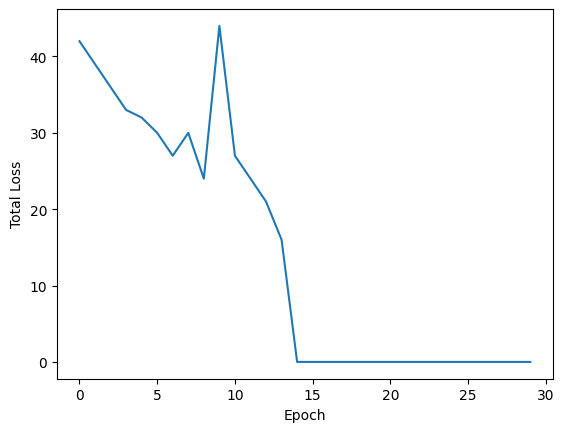

In [24]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

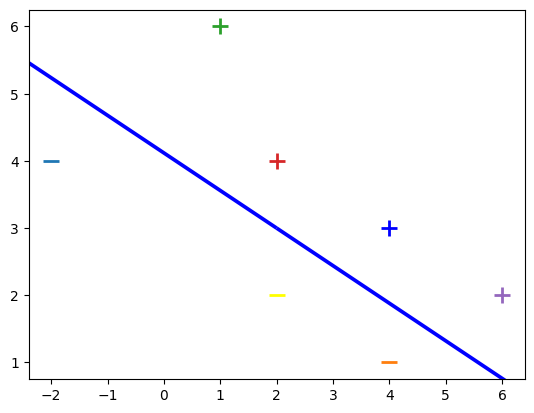

In [25]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training with learning rate: 0.001


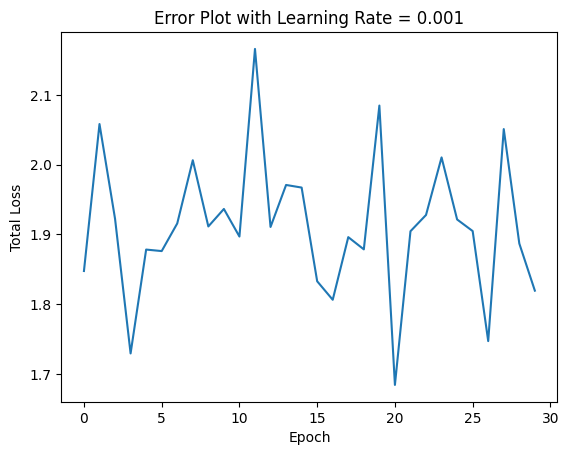

Training with learning rate: 0.01


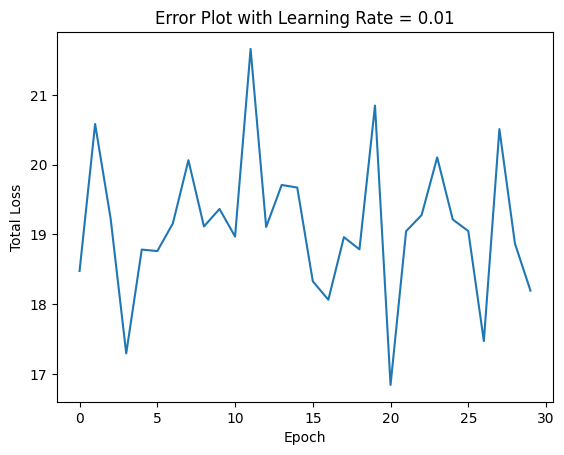

Training with learning rate: 0.1


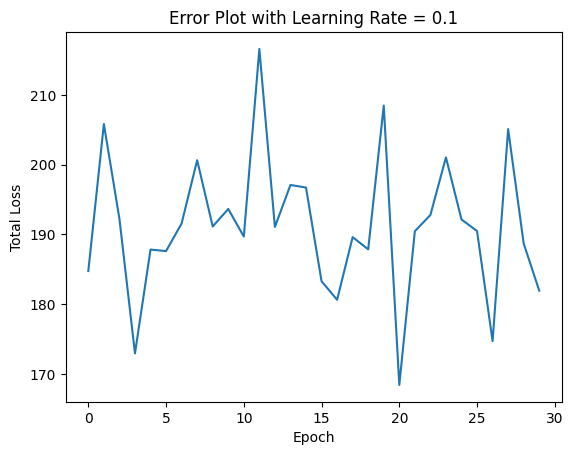

Training with learning rate: 1


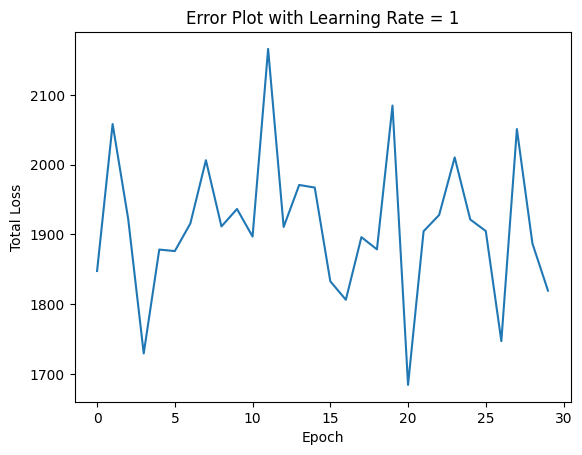

Training with learning rate: 10


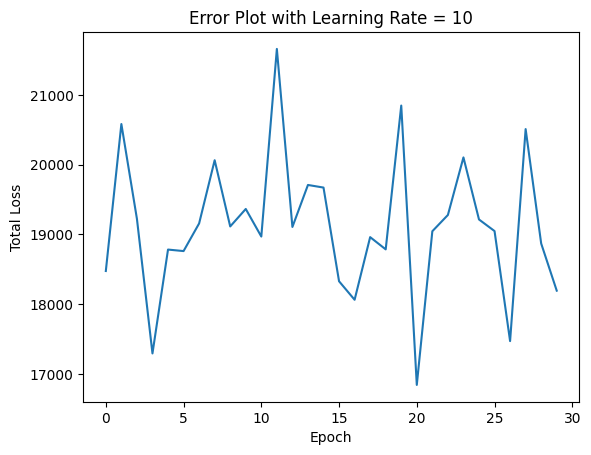

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Sonar dataset from OpenML
sonar_data = fetch_openml(name='Sonar', version=1, as_frame=False)
X = sonar_data.data
y = sonar_data.target

# Convert target to binary (-1, 1)
y = np.where(y == 'R', -1, 1)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def perceptron_algo_plot(X, Y, eta=1, epochs=30):

    w = np.zeros(X.shape[1])
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(-total_error)

    # Plotting the error
    plt.plot(errors)
    plt.title(f'Error Plot with Learning Rate = {eta}')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.show()

    return w

# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 1, 10]
for eta in learning_rates:
    print(f'Training with learning rate: {eta}')
    w = perceptron_algo_plot(X_train, y_train, eta=eta, epochs=30)


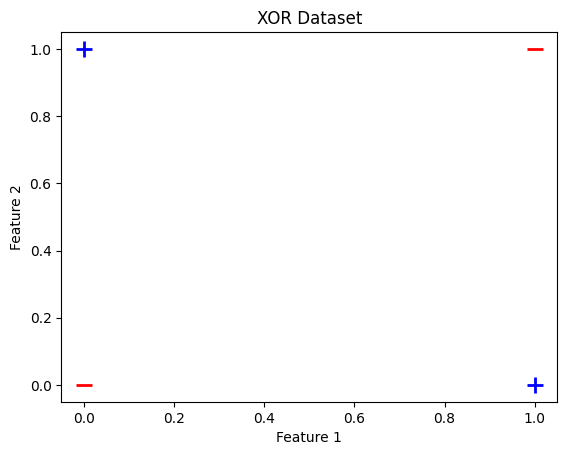

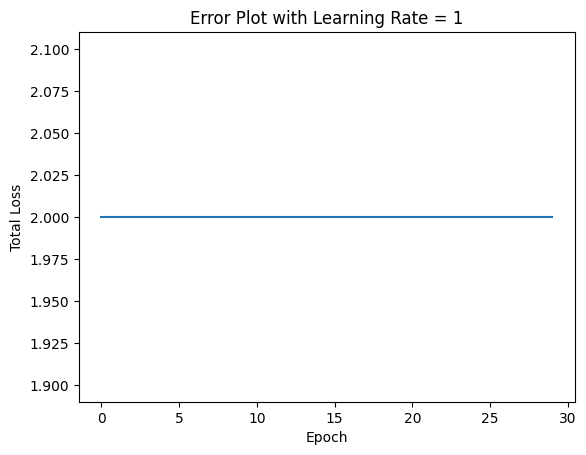

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Create the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, -1])  # Labels for XOR

# Visualize the XOR dataset
for i, sample in enumerate(X):
    if y[i] == 1:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, color='blue')
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, color='red')

plt.title('XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

w = perceptron_algo_plot(X, y, eta=1, epochs=30)

**Observations and Results**

XOR Dataset Visualization:

The XOR dataset consists of four points: (0, 0), (0, 1), (1, 0), and (1, 1).
Points (0, 1) and (1, 0) are labeled as 1 (positive class), and points (0, 0) and (1, 1) are labeled as -1 (negative class).

Perceptron Algorithm Behavior:

The Perceptron algorithm will attempt to find a linear decision boundary to separate the classes.
However, since the XOR problem is not linearly separable, the Perceptron will not be able to find a hyperplane that perfectly classifies all points.
The total error (loss) will not consistently decrease, and the algorithm will fail to converge.

Error Plot:

The error plot is likely to show fluctuations, and the loss will not approach zero.
This indicates that the Perceptron is struggling to minimize the error due to the non-linearly separable nature of the data.
Conclusion:
The Perceptron algorithm cannot solve the XOR problem as it is not linearly separable.
The error plot will reflect the algorithm's failure to converge, demonstrating the limitation of the Perceptron for non-linearly separable data.

In [28]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [29]:
y = np.array([-1, -1, 1, -1, -1])

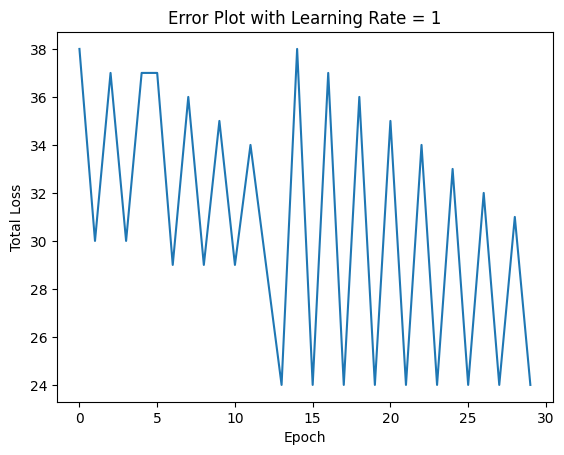

[-2.  3. 15.]


In [30]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

**Learning the "AND" Function with Perceptron**

Dataset:
The dataset for the boolean function "AND" over 2-bit binary input (𝑥1,𝑥2)∈{0,1}×{0,1} is as follows:

x1 x2 y
0	 0	-
0	 1	-
1	 0	-
1	 1	+
where y is the output of the AND function

i) Learnability by Perceptron:
The "AND" function is linearly separable. This means that we can find a linear decision boundary (a hyperplane) that separates the positive examples from the negative examples.

Proof:

For the "AND" function, the perceptron can learn it by finding a weight vector
w and bias b such that:

w⋅x+b>0 for y=+1

w⋅x+b≤0 for y=-1

A possible solution for the weights and bias is:

Weights:
w=[1,1]
Bias:
b=−1.5
Thus, the perceptron can indeed learn the "AND" function.

ii)Weights Update Procedure:
Let's write down the weights update procedure for each iteration using the Perceptron learning rule. We'll assume a learning rate
η of 1 for simplicity.

Initial Values:

Weights:
w=[0,0]
Bias:
b=0
Update Rule:

For each training example
(x,y):

Compute the output:
output=w⋅x+b
Update weights and bias if the example is misclassified:
w←w+η⋅y⋅x
b←b+η⋅y
Iteration Details:

Example (0, 0, -1):

Output:
0⋅0+0⋅0+0=0 (misclassified as positive)

Update :
w←[0,0]+1⋅(−1)⋅[0,0]=[0,0]

b←0+1⋅(−1)=−1
Example (0, 1, -1):

Output:
0⋅0+0⋅1−1=−1 (correctly classified)
No update needed.
Example (1, 0, -1):

Output:
0⋅1+0⋅0−1=−1 (correctly classified)

No update needed.
Example (1, 1, +1):

Output:
0⋅1+0⋅1−1=−1 (misclassified as negative)

Update:
w←[0,0]+1⋅1⋅[1,1]=[1,1]
b←−1+1⋅1=0
After these updates, the weights and bias should be adjusted correctly to classify the "AND" function.


. Learnability of Boolean Functions Over 2-bit Binary Input
There are 2^(2^2)=16 possible boolean functions over a 2-bit binary input, corresponding to all possible truth tables.

Learnable Functions:

Linearly Separable Boolean Functions: Functions that can be separated by a single linear decision boundary. These are functions that produce outputs that can be separated by a line in the 2D feature space. Examples include:
"AND"
"OR"
"NAND"
"NOR"
"XOR" (not linearly separable; see below)
Truth Tables of Boolean Functions Not Learnable by a Perceptron:
The functions that are not linearly separable include:

"XOR":

x1 x2 y
0	 0	-
0	 1	+
1	 0	+
1	 1	-

"XNOR":

x1 x2 y
0	 0	+
0	 1	-
1	 0	-
1	 1	+
These functions cannot be perfectly separated by a single linear boundary, making them non-learnable by a simple Perceptron.

Summary

AND Function: Learnable by a Perceptron.

Boolean Functions: Out of 16 possible boolean functions over 2-bit inputs, 8 are linearly separable and hence learnable by a Perceptron. The remaining functions, including XOR and XNOR, are not linearly separable and thus not learnable by a Perceptron.